In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

import numpy as np

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import requests
import time



# Importing - Train dataset

In [ ]:
pd.options.display.max_rows = 9999

df_train = pd.read_csv('/content/gdrive/MyDrive/Lumiere/data/sign_mnist_train.csv')


In [ ]:
df_train.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202


In [ ]:
df_firstrow = df_train.head(1).copy(deep=False)

In [ ]:
del df_firstrow ['label']

In [ ]:
print (df_firstrow)

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       207       207       207       207       206       206   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  

[1 rows x 784 columns]


In [ ]:
first_image = df_firstrow.values.reshape(28,28)

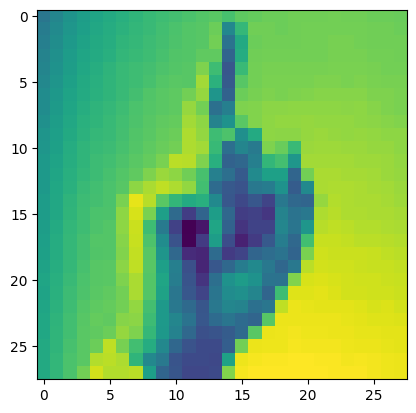

In [ ]:
plt.imshow(first_image)
plt.show()

# Importing - Test dataset

In [ ]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Lumiere/data/sign_mnist_test.csv')

# Preprocessing - Train Dataset

# Checking balance

Text(0.5, 1.0, 'Histogram of 26 classes')

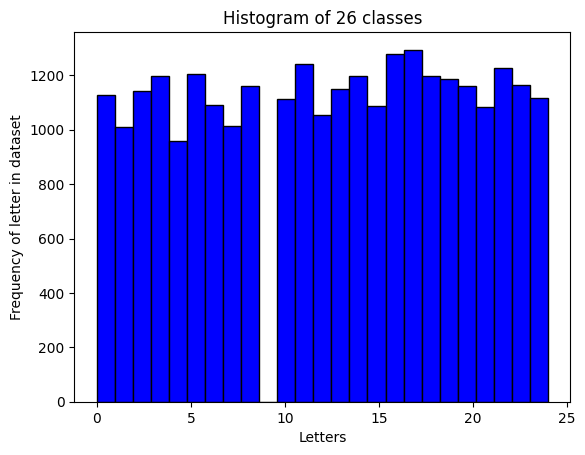

In [ ]:
plt.hist(df_train['label'], color='blue', edgecolor='black', bins=int(25/1))

plt.xlabel('Letters')
plt.ylabel('Frequency of letter in dataset')
plt.title('Histogram of 26 classes')


# One hot encoding

In [ ]:
label_conv = LabelBinarizer()

train_label = label_conv.fit_transform(df_train['label'])

print(train_label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


# Show Random 10 Images

In [ ]:
random_images = df_train.sample(n=10)

for i in range(10):
    random_firstrow = random_images.head(1)

    random_label = random_firstrow['label'].item()
    random_label = chr(random_label + 65)

    del random_firstrow ['label']

    random_firstrow = random_firstrow.values.reshape(28,28)
    plt.imshow(random_firstrow)
    plt.title(random_label)
    plt.show()


    random_images = random_images.iloc[1:]

# Subplot 10 Images

In [ ]:
random_images = df_train.sample(n=10)

fig = plt.figure(figsize=(10, 5))

rows = 2
columns = 5

for i in range(10):
    fig.add_subplot(rows, columns, i+1)
    random_firstrow = random_images.head(1)


    random_label = random_firstrow['label'].item()
    random_label = chr(random_label + 65)

    del random_firstrow ['label']


    random_firstrow = random_firstrow.values.reshape(28,28)
    plt.imshow(random_firstrow)
    plt.title(random_label)
    plt.axis('off')

    random_images = random_images.iloc[1:]

# Normalize image

In [ ]:
df_train_normalized = df_train.drop('label', axis=1) / 255
df_train_normalized['label'] = df_train['label']

print(df_train_normalized)

         pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0      0.419608  0.462745  0.498039  0.525490  0.545098  0.560784  0.572549   
1      0.607843  0.615686  0.611765  0.611765  0.611765  0.615686  0.611765   
2      0.733333  0.737255  0.737255  0.733333  0.733333  0.729412  0.733333   
3      0.827451  0.827451  0.831373  0.831373  0.827451  0.823529  0.827451   
4      0.643137  0.654902  0.666667  0.674510  0.690196  0.701961  0.705882   
...         ...       ...       ...       ...       ...       ...       ...   
27450  0.741176  0.741176  0.745098  0.745098  0.752941  0.756863  0.756863   
27451  0.592157  0.603922  0.615686  0.619608  0.627451  0.631373  0.639216   
27452  0.682353  0.682353  0.682353  0.682353  0.682353  0.686275  0.686275   
27453  0.694118  0.709804  0.721569  0.725490  0.733333  0.741176  0.745098   
27454  0.701961  0.705882  0.705882  0.705882  0.713725  0.709804  0.713725   

         pixel8    pixel9   pixel10  ...  pixel776 

# Preprocessing - Test dataset

# Checking Balance

Text(0.5, 1.0, 'Histogram of 26 classes')

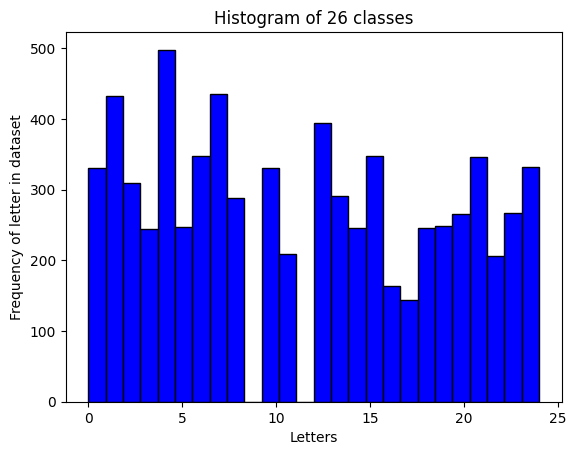

In [ ]:
plt.hist(df_test['label'], color='blue', edgecolor='black', bins=int(26/1))

plt.xlabel('Letters')
plt.ylabel('Frequency of letter in dataset')
plt.title('Histogram of 26 classes')


# One hot encoding

In [ ]:
label_conv = LabelBinarizer()

test_label = label_conv.fit_transform(df_test['label'])

print(test_label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


# Normalize image

In [ ]:
df_test_normalized = df_test.drop('label', axis=1) / 255
df_test_normalized['label'] = df_test['label']

print(df_test_normalized)

        pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0     0.584314  0.584314  0.588235  0.588235  0.588235  0.592157  0.592157   
1     0.494118  0.501961  0.513725  0.517647  0.521569  0.525490  0.529412   
2     0.333333  0.345098  0.360784  0.376471  0.411765  0.482353  0.529412   
3     0.796078  0.803922  0.811765  0.807843  0.811765  0.819608  0.823529   
4     0.737255  0.749020  0.756863  0.764706  0.780392  0.788235  0.792157   
5     0.282353  0.309804  0.341176  0.396078  0.450980  0.486275  0.513725   
6     0.364706  0.392157  0.439216  0.462745  0.482353  0.498039  0.513725   
7     0.694118  0.694118  0.694118  0.694118  0.694118  0.698039  0.701961   
8     0.749020  0.760784  0.768627  0.776471  0.788235  0.796078  0.800000   
9     0.670588  0.674510  0.674510  0.678431  0.678431  0.678431  0.678431   
10    0.831373  0.831373  0.835294  0.831373  0.839216  0.835294  0.835294   
11    0.733333  0.729412  0.733333  0.729412  0.737255  0.733333

In [ ]:
X_train = df_train_normalized.drop('label', axis=1).to_numpy()
y_train = df_train_normalized['label'].to_numpy()

In [ ]:
X_test = df_test_normalized.drop('label', axis=1).to_numpy()
y_test = df_test_normalized['label'].to_numpy()

# Modelling - Train data

In [ ]:
print("size of X_train",X_train.shape)

size of X_train (27455, 784)


In [ ]:
print("size of y_train",y_train.shape)

size of y_train (27455,)


In [ ]:
clf_svm = SVC()
clf_svm.fit(X_train,y_train)

SVC()

# Modelling - Test data

In [ ]:
print("size of X_test",X_test.shape)

size of X_test (7172, 784)


In [ ]:
print("size of y_test",y_test.shape)

size of y_test (7172,)


In [ ]:
preds_svm = clf_svm.predict(X_test)

In [ ]:
print (classification_report(y_test,preds_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.88      0.99      0.93       310
           3       0.92      1.00      0.95       245
           4       0.94      0.99      0.97       498
           5       0.78      0.83      0.80       247
           6       0.93      0.93      0.93       348
           7       0.98      0.94      0.96       436
           8       0.80      0.90      0.85       288
          10       0.79      0.59      0.67       331
          11       0.87      1.00      0.93       209
          12       0.85      0.75      0.79       394
          13       0.90      0.68      0.78       291
          14       0.99      0.83      0.90       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      0.99       164
          17       0.28      0.54      0.37       144
          18       0.71    

In [ ]:
confusion_matrix (y_test,preds_svm)

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 426,   0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 308,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 244,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 495,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0,  20,   0,   0, 206,   0,   0,   0,   0,  21,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 322,   7,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  19,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  20

In [ ]:
clf_svm = SVC(C=10, gamma= 0.1, kernel='rbf')
clf_svm.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
preds_svm = clf_svm.predict(X_test)
print (classification_report(y_test,preds_svm))

In [ ]:
param_grid_svm = {'C': [1],
              'gamma': [0.01, 0.1, 1, 10],
              'kernel': ['rbf']}

grid_svm= GridSearchCV(SVC(),param_grid_svm,refit = True, verbose = 4)
grid_svm.fit(X_train, y_train)

print("Best Parameters: ", grid_svm.best_params_)
print("Best Score: ", grid_svm.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


# Random Forest

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

# Random Forest - Testing

In [ ]:
preds_rf = clf_rf.predict(X_test)

In [ ]:
confusion_matrix (y_test,preds_rf)

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 401,   0,   1,   0,   0,   0,   0,   0,  28,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0, 306,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   2,   0,   0,   0],
       [  1,   0,   0,   0, 475,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22,   0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   0,   0, 225,   0,   0,   0,   0,  12,   0,   0,
          0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0, 295,   2,   2,   0,   0,   0,   0,
          0,   2,   5,   2,   0,  34,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0,   0,   0,  22

In [ ]:
print (classification_report(y_test,preds_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       0.97      0.93      0.95       432
           2       0.95      0.99      0.97       310
           3       0.86      0.98      0.92       245
           4       0.93      0.95      0.94       498
           5       0.91      0.91      0.91       247
           6       0.91      0.85      0.88       348
           7       0.99      0.93      0.96       436
           8       0.84      0.77      0.80       288
          10       0.69      0.64      0.67       331
          11       0.81      1.00      0.89       209
          12       0.85      0.70      0.77       394
          13       0.76      0.56      0.64       291
          14       0.96      0.86      0.91       246
          15       0.91      0.99      0.95       347
          16       0.88      1.00      0.94       164
          17       0.32      0.70      0.44       144
          18       0.52    

In [ ]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(clf_rf, param_grid_rf, cv=5, verbose = 4)
grid_rf.fit(X_train, y_train)

print("Best Parameters: ", grid_svm.best_params_)
print("Best Score: ", grid_svm.best_score_)

# Resnet


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def residual_block(x, filters, stride=1, use_projection=False):
    shortcut = x
    if use_projection:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    input_tensor = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, use_projection=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, use_projection=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, use_projection=True)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=input_tensor, outputs=x, name='resnet18')
    return model

input_shape = (28, 28, 1)
num_classes = 24

model = build_resnet18(input_shape, num_classes)




In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
def create_resnet18(learning_rate=0.001, batch_size=32):
    input_shape = (28, 28, 1)
    num_classes = 24

    model = build_resnet18(input_shape, num_classes)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


model = KerasClassifier(build_fn=create_resnet18, verbose=4)


param_grid = {
    'learning_rate': [0.001],
    'batch_size': [32],
    'epochs': [5],
}



<ipython-input-77-795b60d8b96e>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_resnet18, verbose=4)


In [ ]:

kf = KFold(n_splits=3, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=4, n_jobs=-1)
from sklearn.utils import shuffle
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)


In [ ]:


grid_search.fit(X_train_shuffled.reshape(-1, 28, 28, 1), y_train_shuffled)


print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: ignored

In [ ]:
learning_rates = [0.001, 0.005, 0.01]
batch_sizes = [32, 64, 128]

best_accuracy = 0
best_hyperparameters = {}

# Iterate over hyperparameters
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate: {learning_rate}, batch size: {batch_size}")

        # Build and compile the model with current hyperparameters
        model = build_and_compile_model(input_shape, num_classes, learning_rate, batch_size)

        # Shuffle the training data and labels together
        X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

        # Train the model
        history = model.fit(X_train_shuffled.reshape(-1, 28, 28, 1),
                            keras.utils.to_categorical(y_train_shuffled, num_classes),
                            epochs=20,  # Adjust the number of epochs as needed
                            validation_split=0.2,
                            verbose=0)

        # Evaluate the model on the test data
        _, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1),
                                          keras.utils.to_categorical(y_test, num_classes),
                                          verbose=4)

        print(f"Test accuracy with learning rate {learning_rate}, batch size {batch_size}: {test_accuracy}")

        # Check if this set of hyperparameters is the best so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_hyperparameters = {'learning_rate': learning_rate, 'batch_size': batch_size}

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_hyperparameters)
print("Best Test Accuracy:", best_accuracy)

Training with learning rate: 0.001, batch size: 32


NameError: ignored

# Test different individual training rate

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def residual_block(x, filters, stride=1, use_projection=False):
    shortcut = x
    if use_projection:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    input_tensor = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, use_projection=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, use_projection=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, use_projection=True)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=input_tensor, outputs=x, name='resnet18')
    return model

input_shape = (28, 28, 1)
num_classes = 26

model = build_resnet18(input_shape, num_classes)

In [ ]:
from sklearn.utils import shuffle


X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)


learning_rate = 0.001
batch_size = 32
epochs = 20

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_shuffled.reshape(-1, 28, 28, 1),
                    keras.utils.to_categorical(y_train_shuffled, num_classes),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))


y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

y_pred_labels = np.argmax(y_pred, axis=1)

classification_rep = classification_report(y_test, y_pred_labels)

print(classification_rep)
print (confusion_matrix(y_test, y_pred_labels))


Epoch 1/20
687/687 [==============================] - 868s 1s/step - loss: 0.3644 - accuracy: 0.8851 - val_loss: 2.4246 - val_accuracy: 0.5276
Epoch 2/20
687/687 [==============================] - 869s 1s/step - loss: 0.0602 - accuracy: 0.9812 - val_loss: 2.3332 - val_accuracy: 0.6008
Epoch 3/20
687/687 [==============================] - 841s 1s/step - loss: 0.0470 - accuracy: 0.9866 - val_loss: 0.6796 - val_accuracy: 0.8177
Epoch 4/20
687/687 [==============================] - 842s 1s/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.5081 - val_accuracy: 0.8408
Epoch 5/20
687/687 [==============================] - 843s 1s/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 1.3841e-04 - val_accuracy: 1.0000
Epoch 6/20
687/687 [==============================] - 843s 1s/step - loss: 3.3218e-04 - accuracy: 1.0000 - val_loss: 1.3729e-05 - val_accuracy: 1.0000
Epoch 7/20
687/687 [==============================] - 822s 1s/step - loss: 8.0571e-05 - accuracy: 1.0000 - val_loss: 6.7105e-06 - 

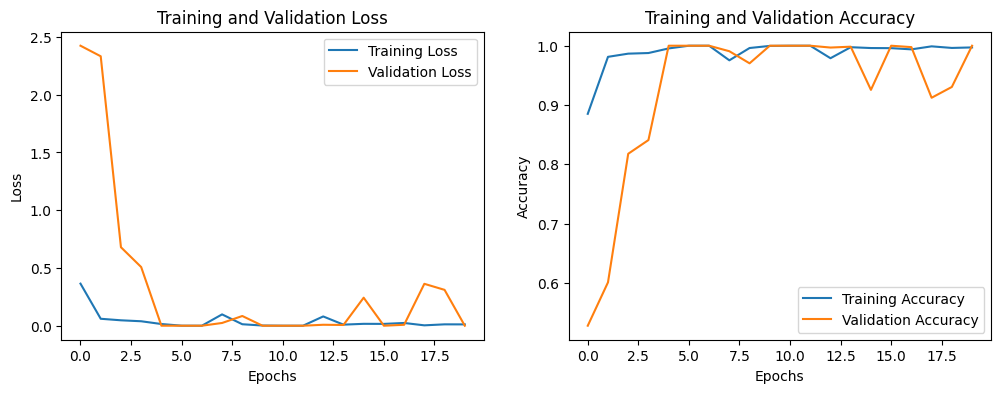

In [ ]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))


y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

y_pred_labels = np.argmax(y_pred, axis=1)

classification_rep = classification_report(y_test, y_pred_labels)

print(classification_rep)

225/225 [==============================] - 15s 67ms/step
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       331
           1       0.69      0.58      0.63       432
           2       0.70      1.00      0.82       310
           3       1.00      0.11      0.19       245
           4       0.46      1.00      0.63       498
           5       0.64      1.00      0.78       247
           6       1.00      0.37      0.54       348
           7       0.91      0.87      0.89       436
           8       0.55      0.71      0.62       288
          10       0.95      0.95      0.95       331
          11       0.99      0.70      0.82       209
          12       0.83      0.42      0.56       394
          13       0.74      0.75      0.74       291
          14       0.60      1.00      0.75       246
          15       0.95      0.99      0.97       347
          16       0.87      1.00      0.93       164
          17       1.00 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))


y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

y_pred_labels = np.argmax(y_pred, axis=1)

classification_rep = classification_report(y_test, y_pred_labels)

print(classification_rep)

225/225 [==============================] - 15s 67ms/step
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       331
           1       0.69      0.58      0.63       432
           2       0.70      1.00      0.82       310
           3       1.00      0.11      0.19       245
           4       0.46      1.00      0.63       498
           5       0.64      1.00      0.78       247
           6       1.00      0.37      0.54       348
           7       0.91      0.87      0.89       436
           8       0.55      0.71      0.62       288
          10       0.95      0.95      0.95       331
          11       0.99      0.70      0.82       209
          12       0.83      0.42      0.56       394
          13       0.74      0.75      0.74       291
          14       0.60      1.00      0.75       246
          15       0.95      0.99      0.97       347
          16       0.87      1.00      0.93       164
          17       1.00 

In [ ]:
h

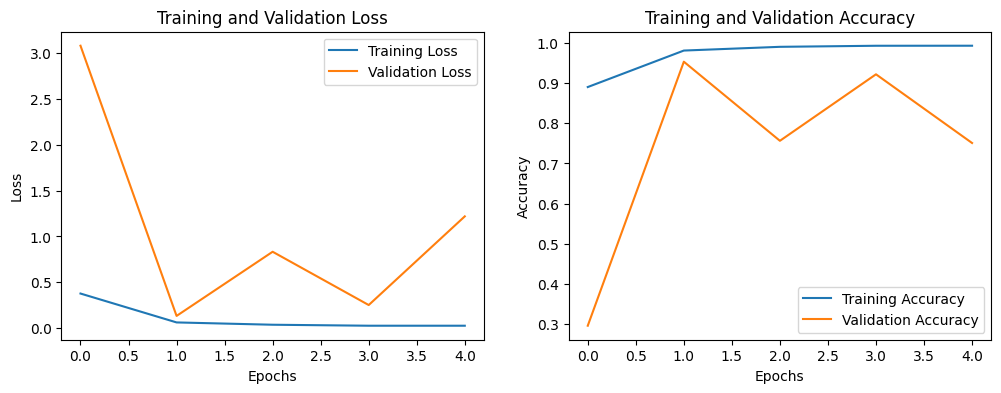

In [ ]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))


y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

y_pred_labels = np.argmax(y_pred, axis=1)

classification_rep = classification_report(y_test, y_pred_labels)

print(classification_rep)

225/225 [==============================] - 15s 67ms/step
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       331
           1       0.69      0.58      0.63       432
           2       0.70      1.00      0.82       310
           3       1.00      0.11      0.19       245
           4       0.46      1.00      0.63       498
           5       0.64      1.00      0.78       247
           6       1.00      0.37      0.54       348
           7       0.91      0.87      0.89       436
           8       0.55      0.71      0.62       288
          10       0.95      0.95      0.95       331
          11       0.99      0.70      0.82       209
          12       0.83      0.42      0.56       394
          13       0.74      0.75      0.74       291
          14       0.60      1.00      0.75       246
          15       0.95      0.99      0.97       347
          16       0.87      1.00      0.93       164
          17       1.00 

In [ ]:
print (confusion_matrix(y_test, y_pred_labels))

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 429   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0
    0   0   0   0   0   0]
 [  0   0 307   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    3   0   0   0   0   0]
 [  0   0   0 159  19   0   7   0   0   0   0   0   0   0  12   2  26   0
   18   0   0   0   2   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 339   6   0   0   0   0   0   0   0   3   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  35 394   0   0   0   0   0   0   4   3   0   0
    0   0   0   0   0   0]
 [ 24  13   0   0   0   0   0   3 198   0   0  25   0   0   5   0   0   0
    0   0   0   0   0  20]
 [  0   0   0   0   0   0   2   0   0 239   0   0   0   0  84   3   0   0
    3   0   0   0

# DONE

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def residual_block(x, filters, stride=1, use_projection=False):
    shortcut = x
    if use_projection:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    input_tensor = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, use_projection=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, use_projection=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, use_projection=True)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=input_tensor, outputs=x, name='resnet18')
    return model

input_shape = (28, 28, 1)
num_classes = 24

model = build_resnet18(input_shape, num_classes)



In [ ]:
from sklearn.utils import shuffle

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)


history = model.fit(X_train_shuffled.reshape(-1, 28, 28, 1),
                    keras.utils.to_categorical(y_train_shuffled, num_classes),
                    epochs=20,
                    validation_split=0.2)


Epoch 1/20
687/687 [==============================] - 785s 1s/step - loss: 0.4474 - accuracy: 0.8656 - val_loss: 1.5621 - val_accuracy: 0.6321
Epoch 2/20
687/687 [==============================] - 774s 1s/step - loss: 0.0523 - accuracy: 0.9830 - val_loss: 2.9422 - val_accuracy: 0.4404
Epoch 3/20
687/687 [==============================] - 774s 1s/step - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.3198 - val_accuracy: 0.9031
Epoch 4/20
687/687 [==============================] - 772s 1s/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.6006 - val_accuracy: 0.8627
Epoch 5/20
687/687 [==============================] - 770s 1s/step - loss: 0.0535 - accuracy: 0.9849 - val_loss: 0.0562 - val_accuracy: 0.9801
Epoch 6/20
687/687 [==============================] - 771s 1s/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 2.1196 - val_accuracy: 0.5882
Epoch 7/20
687/687 [==============================] - 776s 1s/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.2110 - val_accuracy: 0.9434

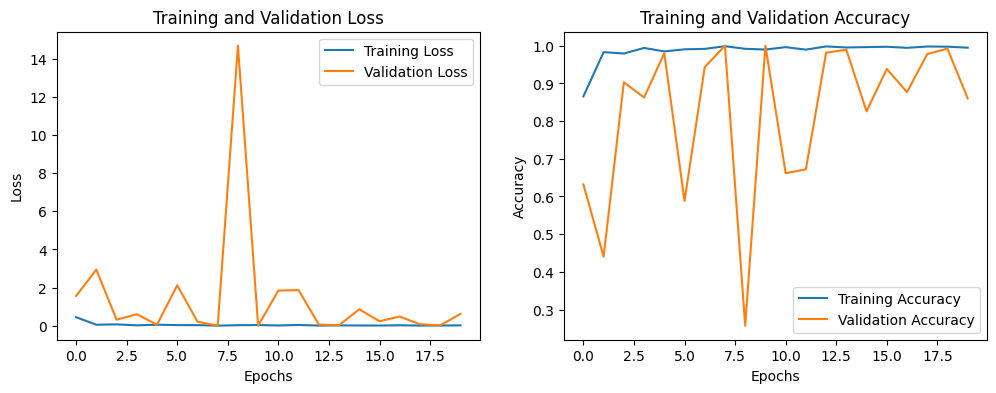

In [ ]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))

# Generate predictions
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_labels)

# Print the classification report
print(classification_rep)

225/225 [==============================] - 13s 59ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       331
           1       1.00      0.54      0.70       432
           2       1.00      0.97      0.99       310
           3       1.00      0.82      0.90       245
           4       0.81      0.87      0.84       498
           5       0.93      0.91      0.92       247
           6       0.34      0.86      0.49       348
           7       0.62      1.00      0.77       436
           8       1.00      0.58      0.73       288
          10       0.99      0.55      0.71       331
          11       1.00      0.67      0.80       209
          12       1.00      0.81      0.89       394
          13       1.00      0.53      0.69       291
          14       0.95      0.93      0.94       246
          15       1.00      0.85      0.92       347
          16       1.00      0.99      1.00       164
          17       0.84 

# OTHERS

In [ ]:
print (confusion_matrix(y_test, y_pred_labels))

[[274   0   0   0   0   0   4   8   0   0   0   0   0   0   0   0   0   0
   45   0   0   0   0   0]
 [  0 234   0   0  48   3 122   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  13   4   8]
 [  0   0 301   0   0   9   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 202   0   4  16   0   0   0   0   0   0   0   0   0   0   0
   23   0   0   0   0   0]
 [  0   0   0   0 434   0  16   0   0   0   0   0   0   0   0   0   0  48
    0   0   0   0   0   0]
 [  0   0   0   0   0 225  15   0   0   0   0   0   0   0   0   0   0   0
    7   0   0   0   0   0]
 [  0   0   0   0   0   0 300  48   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   1 435   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   2   0   0  23 167   0   0   0   0   0   0   0   0   7
   30   0   0   0  14  45]
 [  0   0   0   0   0   0  49  56   0 182   0   0   0   0   0   0   0   0
    4  40   0   0

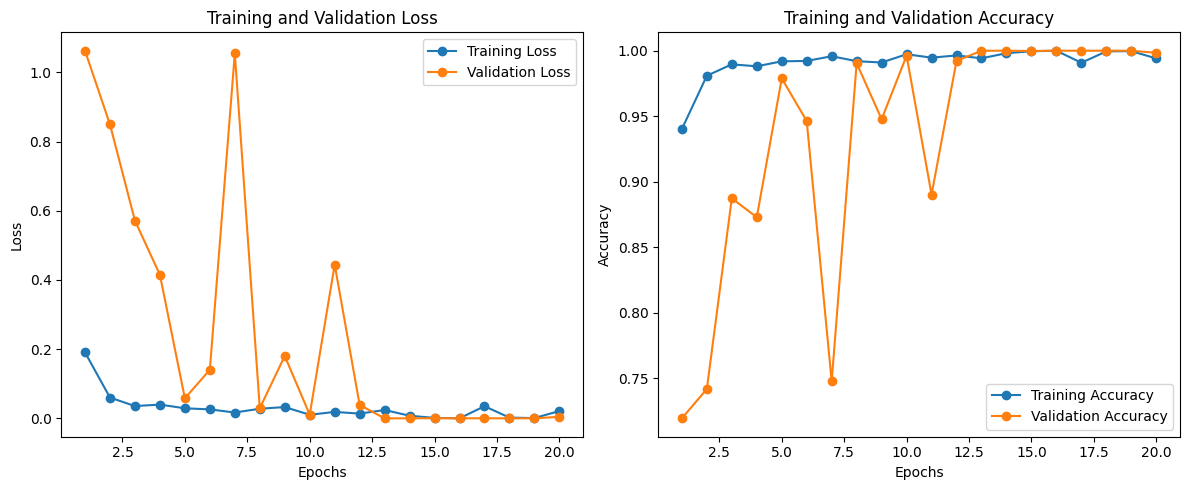

In [ ]:
import matplotlib.pyplot as plt

# Define your data
epochs = range(1, 21)  # Assuming 20 epochs
training_loss = [0.1908, 0.0601, 0.0355, 0.0397, 0.0291, 0.0259, 0.0168, 0.0278, 0.0326, 0.0103, 0.0186, 0.0137, 0.0241, 0.0076, 0.0013, 7.6772e-05, 0.0351, 0.0021, 7.5066e-04, 0.0212]
validation_loss = [1.0629, 0.8498, 0.5716, 0.4150, 0.0578, 0.1405, 1.0550, 0.0293, 0.1803, 0.0107, 0.4444, 0.0387, 3.4329e-05, 2.3176e-05, 4.1629e-04, 3.6566e-06, 2.1310e-04, 1.5953e-05, 8.3195e-06, 0.0045]
training_accuracy = [0.9402, 0.9809, 0.9896, 0.9881, 0.9919, 0.9922, 0.9958, 0.9920, 0.9910, 0.9973, 0.9947, 0.9964, 0.9942, 0.9981, 0.9996, 1.0000, 0.9908, 0.9995, 0.9997, 0.9941]
validation_accuracy = [0.7194, 0.7418, 0.8873, 0.8729, 0.9789, 0.9463, 0.7476, 0.9905, 0.9477, 0.9962, 0.8902, 0.9922, 1.0000, 1.0000, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 0.9984]

# Create two subplots
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def residual_block(x, filters, stride=1, use_projection=False):
    shortcut = x
    if use_projection:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    input_tensor = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, use_projection=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, use_projection=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, use_projection=True)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=input_tensor, outputs=x, name='resnet18')
    return model

input_shape = (28, 28, 1)
num_classes = 26

model = build_resnet18(input_shape, num_classes)


model.summary()


Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 64)   3200        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 14, 14, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 14, 14, 64)   0           ['batch_normalization[0][0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from sklearn.metrics import classification_report

# Assuming you have already trained your model and stored it in the 'model' variable

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))

# Generate predictions
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_labels)

# Print the classification report
print(classification_rep)
print (confusion_matrix(y_test, y_pred_labels))

225/225 [==============================] - 14s 59ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       245
           4       0.07      1.00      0.13       498
           5       0.00      0.00      0.00       247
           6       0.00      0.00      0.00       348
           7       0.00      0.00      0.00       436
           8       0.00      0.00      0.00       288
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.00      0.00      0.00       291
          14       0.00      0.00      0.00       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
          17       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


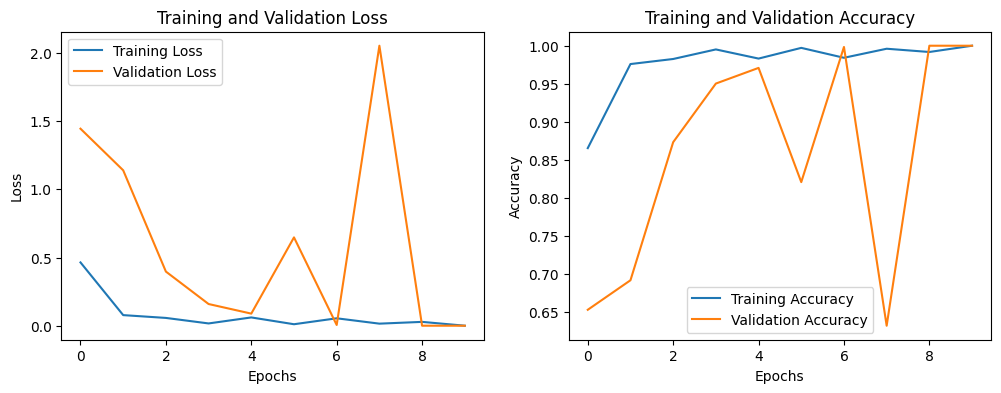

In [ ]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model and stored it in the 'model' variable

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), keras.utils.to_categorical(y_test, num_classes))

# Generate predictions
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_labels)

# Print the classification report
print(classification_rep)

225/225 [==============================] - 10s 42ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.93      1.00      0.97       498
           5       1.00      1.00      1.00       247
           6       0.95      0.94      0.95       348
           7       0.96      0.97      0.97       436
           8       0.97      1.00      0.98       288
          10       0.95      0.99      0.97       331
          11       0.91      1.00      0.95       209
          12       0.92      0.89      0.91       394
          13       1.00      0.81      0.89       291
          14       1.00      1.00      1.00       246
          15       0.99      1.00      0.99       347
          16       1.00      1.00      1.00       164
          17       1.00 

In [ ]:
print (confusion_matrix(y_test, y_pred_labels))

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 432   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 328  16   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  12 424   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 288   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0 329   0   0   0   0   0   0   0   0
    0   0   0   0